# *1. Instalar paquetes necesarios*

In [ ]:
''' Instale paquetes de MySQL y de lectura de archivos
    de Excel, y de geoanalitica'''

!pip install mysql-connector-python openpyxl geopandas folium # Son estos los paquetes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 51.9 MB/s eta 0:00:00


In [ ]:
# Instalar mapclassify para tener n grupos de color en el mapa
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 3.6 MB/s eta 0:00:00


# *2. Importar posibles librerías necesarias*

In [ ]:
''' Importar aquí las librerías necesarias'''

import mysql.connector                               #Para conectarse a SQL
import pandas as pd                                  #Para manipular los datos
import os                                            #Interacción con la máquina
import glob                                          #Encontrar ruta
import re                                            #Encontrar patrones de texto
import matplotlib.pyplot as plt                      #Hacer Gráficos
import numpy as np                                   #Hacer operaciones con los datos
import geopandas as gpd                              #Hacer Geo analitica
import mapclassify                                   #Clasificación de color
import seaborn as sns                                #Hacer Gráficos
from sklearn.model_selection import train_test_split #Modelos de aprendizaje
from scipy.stats import chi2_contingency             #Pruebas estadisticas Chi2

# *3. Conceder permiso a Google drive para acceder a los archivos subidos*

In [ ]:
''' Conceder permiso a Google drive para acceder a los archivos subidos'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *4. Leer las rutas de los archivos en Google Drive*

In [ ]:
''' Estas son la rutas donde estan los 3 grupos de archivos'''

ruta_admitidos = "/content/drive/MyDrive/Bases de Datos/Admitidos"
ruta_matriculados = "/content/drive/MyDrive/Bases de Datos/Matriculados 1er Curso"
ruta_graduados = "/content/drive/MyDrive/Bases de Datos/Graduados"
ruta_drivers = "/content/drive/MyDrive/Bases de Datos/Drivers/Columnas Modelo.xlsx"

# *5. Leer los archivos en cada carpeta y concaternalos para crear 3 dataframes distintos*

In [ ]:
''' Tomar del archivo ruta_drivers (que es un .xlsx) cada hoja por individual
    y crear un dataframe por cada hoja'''

# Driver 1
df_columnas_finales = pd.read_excel(ruta_drivers, sheet_name="Columnas_Que_Sobreviven")
df_columnas_finales = df_columnas_finales[df_columnas_finales["Cuales sobreviven"] == "x"]
# Creo la lista de las columnas que quedan finalmente
columnas_que_se_quedan = df_columnas_finales["Nombres Ajustados"].tolist()

# Driver 2
df_nombres_ajustados = pd.read_excel(ruta_drivers, sheet_name="Nombres_Columnas")
# Creo un diccionario que ajusta los nombres
diccionario_nombres = df_nombres_ajustados.set_index("Posibles Nombres Columnas")["Nombres Ajustados"].to_dict()

In [ ]:
''' Crear una función que lea los archivos xlsx
    en una ruta de drive y cree un dataframe por cada archivo
    y ajuste los nombres de las columnas '''

# Esta función tiene como objetivo leer los archivos en una ruta y crear
# un dataframe por cada archivo

def concat_archivos(ruta):
  archivos = glob.glob(os.path.join(ruta, "*.xlsx"))
  lista_df = []
  for archivo in archivos:
    df = pd.read_excel(archivo)
    df = df.rename(columns=diccionario_nombres)
    lista_df.append(df)
  df_concat = pd.concat(lista_df)
  return df_concat

In [ ]:
''' Crear los 3 Dataframes en función de las rutas asignadas'''

df_admitidos = concat_archivos(ruta_admitidos)
df_matriculados = concat_archivos(ruta_matriculados)
df_graduados = concat_archivos(ruta_graduados)

In [ ]:
''' Ajustar bases de graduados, admitidos y matriculados'''

#Base graduados
columnas_existentes1 = [col for col in columnas_que_se_quedan if col in df_graduados.columns]
df_graduados = df_graduados[columnas_existentes1]

#Base admitidos
columnas_existentes2 = [col for col in columnas_que_se_quedan if col in df_admitidos.columns]
df_admitidos = df_admitidos[columnas_existentes2]

#Base matriculados
columnas_existentes3 = [col for col in columnas_que_se_quedan if col in df_matriculados.columns]
df_matriculados = df_matriculados[columnas_existentes3]

#Crear un dataframe final
df_Total = pd.concat([df_graduados, df_admitidos, df_matriculados])

# *6. Filtrar y validar datos del dataframe final que se piensa usar*

In [ ]:
# Filtar con el campo ID CINE Amplio el número 6

df_Total = df_Total[df_Total['ID CINE CAMPO AMPLIO'] == 6]

In [ ]:
# Ver estructura del dataframe
df_Total.head()

,IES PADRE,INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES),ID SECTOR IES,SECTOR IES,ID CARÁCTER IES,CARÁCTER IES,ID NIVEL ACADÉMICO,NIVEL ACADÉMICO,ID NIVEL DE FORMACIÓN,NIVEL DE FORMACIÓN,...,DESC CINE CAMPO AMPLIO,CÓDIGO DEL DEPARTAMENTO (PROGRAMA),DEPARTAMENTO DE OFERTA DEL PROGRAMA,ID SEXO,SEXO,AÑO,SEMESTRE,GRADUADOS,ADMITIDOS,PRIMER CURSO
448,1101.0,UNIVERSIDAD NACIONAL DE COLOMBIA,1.0,OFICIAL,4.0,Universidad,2.0,POSGRADO,2.0,Maestría,...,Tecnologías de la Información y la Comunicació...,11.0,"Bogotá, D.C.",1.0,Hombre,2021.0,2.0,7.0,NaN,NaN
449,1101.0,UNIVERSIDAD NACIONAL DE COLOMBIA,1.0,OFICIAL,4.0,Universidad,2.0,POSGRADO,2.0,Maestría,...,Tecnologías de la Información y la Comunicació...,11.0,"Bogotá, D.C.",2.0,Mujer,2021.0,2.0,1.0,NaN,NaN
495,1101.0,UNIVERSIDAD NACIONAL DE COLOMBIA,1.0,OFICIAL,4.0,Universidad,2.0,POSGRADO,3.0,Doctorado,...,Tecnologías de la Información y la Comunicació...,11.0,"Bogotá, D.C.",1.0,Hombre,2021.0,1.0,1.0,NaN,NaN
496,1101.0,UNIVERSIDAD NACIONAL DE COLOMBIA,1.0,OFICIAL,4.0,Universidad,2.0,POSGRADO,3.0,Doctorado,...,Tecnologías de la Información y la Comunicació...,11.0,"Bogotá, D.C.",1.0,Hombre,2021.0,2.0,2.0,NaN,NaN
575,1101.0,UNIVERSIDAD NACIONAL DE COLOMBIA,1.0,OFICIAL,4.0,Universidad,2.0,POSGRADO,1.0,Especialización universitaria,...,Tecnologías de la Información y la Comunicació...,11.0,"Bogotá, D.C.",1.0,Hombre,2021.0,1.0,3.0,NaN,NaN


In [ ]:
# Validar información en columnas
df_Total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44895 entries, 448 to 44246
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   IES PADRE                                44895 non-null  float64
 1   INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)  44895 non-null  object 
 2   ID SECTOR IES                            44895 non-null  float64
 3   SECTOR IES                               44895 non-null  object 
 4   ID CARÁCTER IES                          44895 non-null  float64
 5   CARÁCTER IES                             44895 non-null  object 
 6   ID NIVEL ACADÉMICO                       44895 non-null  float64
 7   NIVEL ACADÉMICO                          44895 non-null  object 
 8   ID NIVEL DE FORMACIÓN                    44895 non-null  float64
 9   NIVEL DE FORMACIÓN                       44895 non-null  object 
 10  ID MODALIDAD                             44895 no

In [ ]:
# Validar valores de columnas categorícas que decidimos dejar en el modelo

print(df_Total['SECTOR IES'].unique()) #Listo
print(df_Total['CARÁCTER IES'].unique()) #Listo
print(df_Total['DEPARTAMENTO DE OFERTA DEL PROGRAMA'].unique()) #Listo
print(df_Total['NIVEL ACADÉMICO'].unique())
print(df_Total['NIVEL DE FORMACIÓN'].unique())
print(df_Total['MODALIDAD'].unique())
print(df_Total['DESC CINE CAMPO AMPLIO'].unique())
print(df_Total['SEXO'].unique())

['OFICIAL' 'PRIVADA' 'Oficial' 'Privado' 'Privada']
['Universidad' 'Institución Universitaria/Escuela Tecnológica'
 'Institución Tecnológica' 'Institución Técnica Profesional'
 'INSTITUCIÓN UNIVERSITARIA/ESCUELA TECNOLÓGICA' 'UNIVERSIDAD'
 'INSTITUCIÓN TECNOLÓGICA' 'INSTITUCIÓN TÉCNICA PROFESIONAL'
 'INSTITUCION UNIVERSITARIA/ESCUELA TECNOLOGICA' 'INSTITUCION TECNOLOGICA'
 'INSTITUCION TECNICA PROFESIONAL']
['Bogotá, D.C.' 'Antioquia' 'Caldas' 'Boyacá' 'Cauca' 'Risaralda' 'Nariño'
 'Huila' 'Caquetá' 'Meta' 'Cesar' 'Valle Del Cauca' 'Santander' 'Bolívar'
 'Córdoba' 'Tolima' 'Quindío' 'Norte De Santander' 'Magdalena'
 'Cundinamarca' 'La Guajira' 'Atlántico' 'Casanare' 'Sucre' 'Chocó'
 'Putumayo' 'Archipiélago De San Andrés, Providencia Y Santa Catalina'
 'Arauca' 'Vichada' 'Guaviare' 'Guainía' 'Bogotá D.C.' 'Valle del Cauca'
 'Norte de Santander'
 'Archipiélago de San Andrés, Providencia y Santa Catalina' 'Amazonas'
 'ATLÁNTICO' 'CAQUETÁ' 'SANTANDER' 'RISARALDA' 'ANTIOQUIA' 'BOGOTÁ D.C.'

# *7. Crear diccionarios que homologuen los nombres de las columnas categoricas*

In [ ]:
''' Crear una función que permite operar texto de forma optima para poder
    homologar los datos de las columnas categoricas '''

#Libreria util para operar texto, ya se tiene Re y Pandas Arriba
import unicodedata

def limpiar_formatear_nompropio(texto):
    if pd.isnull(texto):
        return texto

    # Eliminar acentos
    texto = unicodedata.normalize("NFKD", texto).encode("ASCII", "ignore").decode("utf-8")

    # Eliminar caracteres especiales (deja solo letras y espacios)
    texto = re.sub(r"[^a-zA-Z\s]", "", texto)

    # Pasar a minúsculas
    texto = texto.lower()

    # Eliminar espacios múltiples
    texto = re.sub(r"\s+", " ", texto).strip()

    # Palabras que deben ir en minúscula si no son la primera
    palabras_minusculas = {"de", "la", "del", "y", "en", "el", "los", "las", "un", "una"}

    palabras = texto.split()
    if not palabras:
        return ""

    resultado = [palabras[0].capitalize()] + [
        p if p in palabras_minusculas else p.capitalize() for p in palabras[1:]
    ]

    return " ".join(resultado)

In [ ]:
#Aplicar la función Anterior para Homologar en gran medida los datos
df_Total['SECTOR IES'] = df_Total['SECTOR IES'].apply(limpiar_formatear_nompropio) #ok
df_Total['CARÁCTER IES'] = df_Total['CARÁCTER IES'].apply(limpiar_formatear_nompropio) #ok
df_Total['DEPARTAMENTO DE OFERTA DEL PROGRAMA'] = df_Total['DEPARTAMENTO DE OFERTA DEL PROGRAMA'].apply(limpiar_formatear_nompropio) #ok
df_Total['NIVEL ACADÉMICO'] = df_Total['NIVEL ACADÉMICO'].apply(limpiar_formatear_nompropio) #ok
df_Total['NIVEL DE FORMACIÓN'] = df_Total['NIVEL DE FORMACIÓN'].apply(limpiar_formatear_nompropio) #ok
df_Total['MODALIDAD'] = df_Total['MODALIDAD'].apply(limpiar_formatear_nompropio) #ok
df_Total['DESC CINE CAMPO AMPLIO'] = df_Total['DESC CINE CAMPO AMPLIO'].apply(limpiar_formatear_nompropio) #Ok
df_Total['SEXO'] = df_Total['SEXO'].apply(limpiar_formatear_nompropio) #ok

In [ ]:
# Resolver Particularidades Sector IES
df_Total['SECTOR IES'] = df_Total['SECTOR IES'].replace({
    'Oficial':'Oficial',
    'Privada':'Privada',
    'Privado':'Privada'
    })

In [ ]:
# Resolver particularidades Departamento
df_Total['DEPARTAMENTO DE OFERTA DEL PROGRAMA'] = df_Total['DEPARTAMENTO DE OFERTA DEL PROGRAMA'].replace({
    'Bogota Dc':'Bogota Dc',
    'Antioquia':'Antioquia',
    'Caldas':'Caldas',
    'Boyaca':'Boyaca',
    'Cauca':'Cauca',
    'Risaralda':'Risaralda',
    'Narino':'Narino',
    'Huila':'Huila',
    'Caqueta':'Caqueta',
    'Meta':'Meta',
    'Cesar':'Cesar',
    'Valle del Cauca':'Valle del Cauca',
    'Santander':'Santander',
    'Bolivar':'Bolivar',
    'Cordoba':'Cordoba',
    'Tolima':'Tolima',
    'Quindio':'Quindio',
    'Norte de Santander':'Norte de Santander',
    'Magdalena':'Magdalena',
    'Cundinamarca':'Cundinamarca',
    'La Guajira':'La Guajira',
    'Atlantico':'Atlantico',
    'Casanare':'Casanare',
    'Sucre':'Sucre',
    'Choco':'Choco',
    'Putumayo':'Putumayo',
    'Archipielago de San Andres Providencia y Santa Catalina':'San Andres Providencia y Santa Catalina',
    'Arauca':'Arauca',
    'Vichada':'Vichada',
    'Guaviare':'Guaviare',
    'Guainia':'Guainia',
    'Amazonas':'Amazonas',
    'Guainia':'Guainia',
    'Amazonas' :'Amazonas',
    'Archipielago de Sa':'San Andres Providencia y Santa Catalina',
    'Vaupes':'Vaupes',
    'San Andres y Providencia':'San Andres Providencia y Santa Catalina',
    'Narinio':'Narino',
    'Guajira':'La Guajira',
    'San Andres y Provi':'San Andres y Provi'
    })

In [ ]:
# Resolver particularidades Nivel de formación
df_Total["NIVEL DE FORMACIÓN"] = df_Total["NIVEL DE FORMACIÓN"].apply(
    lambda x: "Universitario" if x == "Universitaria"
    else "Tecnologico" if x == "Tecnologica"
    else "Especializacion Universitaria" if x == "Especializacion"
    else x
)

In [ ]:
# Resolver particularidades modalidad
df_Total["MODALIDAD"] = df_Total["MODALIDAD"].apply(
    lambda x: "Hibrido" if x == "Presencialvirtual"
    else "Hibrido" if x == "Presencialdual"
    else "Hibrido" if x == "Presencialvirtuala Distancia"
    else "A Distancia" if x == "Distancia Tradicional"
    else "Virtual" if x == "Distancia Virtual"
    else "A Distancia" if x == "Distancia Tradicion"
    else "A Distancia" if x == "A Distancia Tradicional"
    else "Virtual" if x == "A Distancia Virtual"
    else x)

In [ ]:
# Resolver particularidades Sexo
df_Total["SEXO"] = df_Total["SEXO"].apply(
    lambda x: "Femenino" if x == "Mujer"
    else "Masculino" if x == "Hombre"
    else "No Informa" if x == "Sin Informacion"
    else x)

In [ ]:
# Resolver particularidades del Año
df_Total['AÑO']=df_Total['AÑO'].replace('<U+FEFF>2021' , 2021)
df_Total['AÑO'] = df_Total['AÑO'].astype(float)

In [ ]:
df_Total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44895 entries, 448 to 44246
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   IES PADRE                                44895 non-null  float64
 1   INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)  44895 non-null  object 
 2   ID SECTOR IES                            44895 non-null  float64
 3   SECTOR IES                               44895 non-null  object 
 4   ID CARÁCTER IES                          44895 non-null  float64
 5   CARÁCTER IES                             44895 non-null  object 
 6   ID NIVEL ACADÉMICO                       44895 non-null  float64
 7   NIVEL ACADÉMICO                          44895 non-null  object 
 8   ID NIVEL DE FORMACIÓN                    44895 non-null  float64
 9   NIVEL DE FORMACIÓN                       44895 non-null  object 
 10  ID MODALIDAD                             44895 no

In [ ]:
# Exportar df_Total como .csv separados por ","
df_Total.to_csv('df_Total.csv', index=False, sep=',')

# **8**. Convertir datos al formato que se necesita y agrupar los datos

In [ ]:
# Identificar columnas tipo float64
columnas_float = df_Total.select_dtypes(include='float64').columns

# Convertir esas columnas a entero
df_Total[columnas_float] = df_Total[columnas_float].astype('Int64')

In [ ]:
# Validar datos ajustados
df_Total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44895 entries, 448 to 44246
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   IES PADRE                                44895 non-null  Int64 
 1   INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)  44895 non-null  object
 2   ID SECTOR IES                            44895 non-null  Int64 
 3   SECTOR IES                               44895 non-null  object
 4   ID CARÁCTER IES                          44895 non-null  Int64 
 5   CARÁCTER IES                             44895 non-null  object
 6   ID NIVEL ACADÉMICO                       44895 non-null  Int64 
 7   NIVEL ACADÉMICO                          44895 non-null  object
 8   ID NIVEL DE FORMACIÓN                    44895 non-null  Int64 
 9   NIVEL DE FORMACIÓN                       44895 non-null  object
 10  ID MODALIDAD                             44895 non-null  Int6

In [ ]:
''' Realizar una tabla pivote con todas las columna del dataframe
    para eliminar filas nulos y agrupar los datos'''

# Lista de columnas a sumar
cols_sumar = ['GRADUADOS', 'ADMITIDOS', 'PRIMER CURSO']

# Hacemos groupby con todas las demás columnas
df_Total_Agrupado = df_Total.groupby(
    [col for col in df_Total.columns if col not in cols_sumar],
    as_index=False
)[cols_sumar].sum()


# *9. Crear nuevos df necesarios para el app en streamlit*

In [ ]:
# Exportar df_Total como .csv separados por ","
df_Total_Agrupado.to_csv('df_Total.csv', index=False, sep=',')

In [ ]:
# Crear Datframe para cada Caso, eliminando columnas
df_Graduados = df_Total_Agrupado.drop(columns=['ADMITIDOS', 'PRIMER CURSO'])
df_Admitidos = df_Total_Agrupado.drop(columns=['GRADUADOS', 'PRIMER CURSO'])
df_Matriculados = df_Total_Agrupado.drop(columns=['GRADUADOS', 'ADMITIDOS'])

# Exportar CSV de cada uno de ellos
df_Graduados.to_csv('df_Graduados.csv', index=False, sep=',')
df_Admitidos.to_csv('df_Admitidos.csv', index=False, sep=',')
df_Matriculados.to_csv('df_Matriculados.csv', index=False, sep=',')

#**10**. Análisis Exploratorio

# 10.1. Evolución de participación de mujeres por etapa y año

In [ ]:
# Evolución anual por etapa
# Agrupar por año y sexo
admitidos_por_año = df_Total.groupby(["AÑO", "SEXO"])["ADMITIDOS"].sum().reset_index()
matriculados_por_año = df_Total.groupby(["AÑO", "SEXO"])["PRIMER CURSO"].sum().reset_index()
graduados_por_año = df_Total.groupby(["AÑO", "SEXO"])["GRADUADOS"].sum().reset_index()

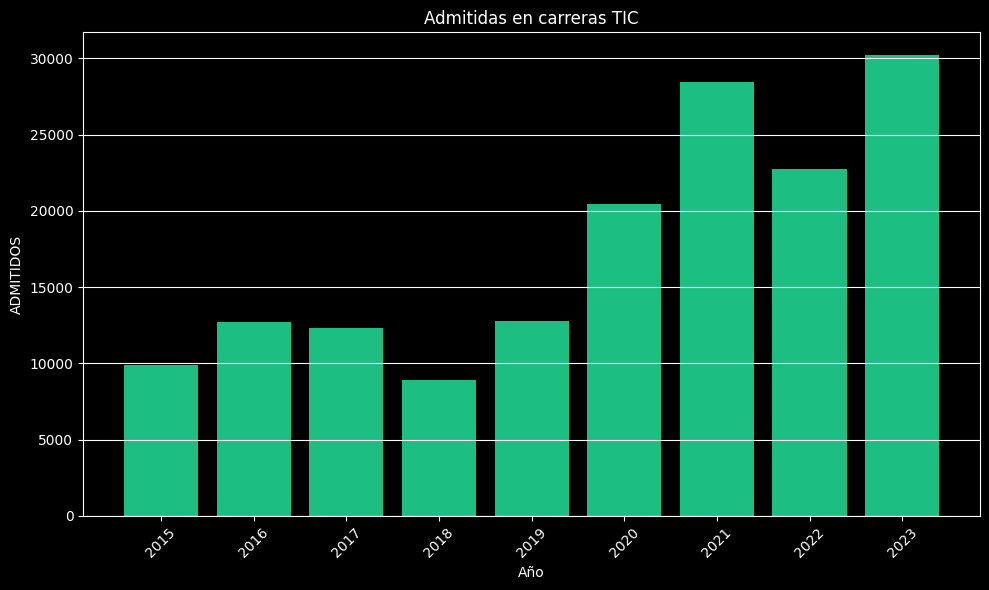

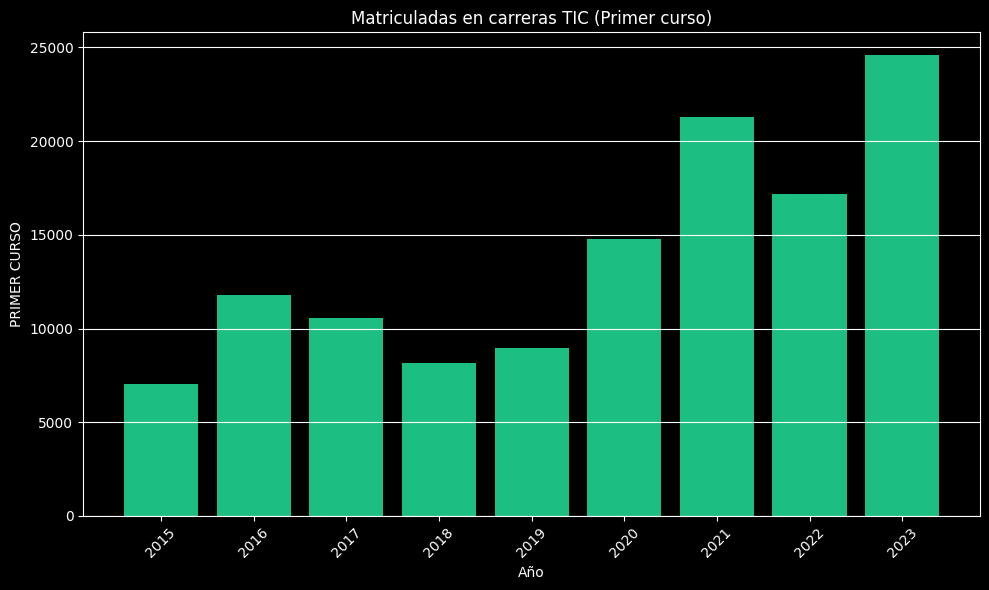

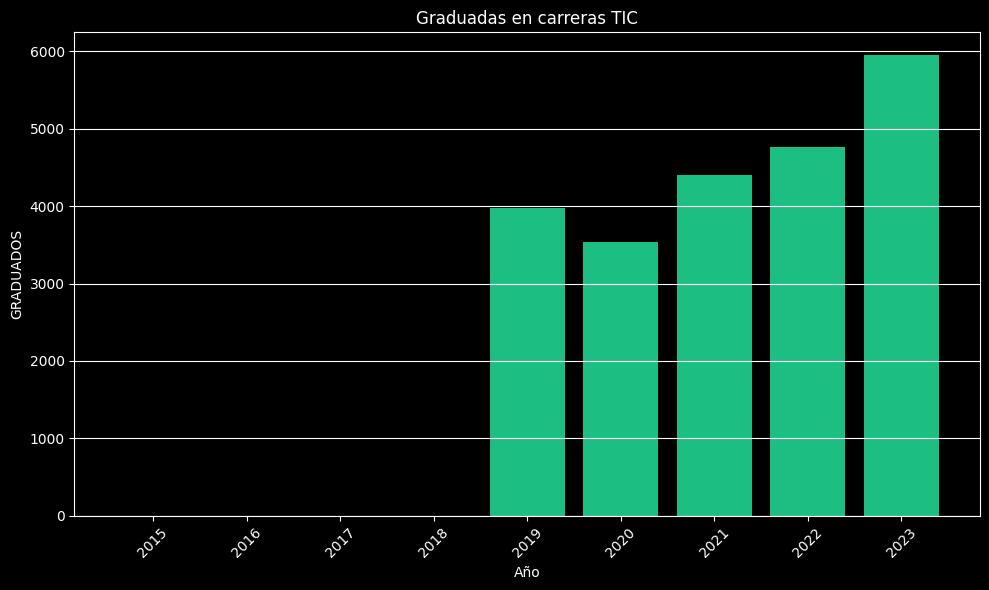

In [ ]:
# Visualizar
plt.style.use('dark_background')
def graficar(df, columna, titulo):
    df_mujeres = df[df["SEXO"].str.lower().str.contains("femenino")]

    # Convertir la columna AÑO correctamente
    años = df_mujeres["AÑO"].astype(float).astype(int)

    plt.figure(figsize=(10,6))
    plt.bar(años, df_mujeres[columna], color="#1dbe82")
    plt.title(titulo)
    plt.xlabel("Año")
    plt.ylabel(columna)
    plt.xticks(años, rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
graficar(admitidos_por_año, "ADMITIDOS", "Admitidas en carreras TIC")
graficar(matriculados_por_año, "PRIMER CURSO", "Matriculadas en carreras TIC (Primer curso)")
graficar(graduados_por_año, "GRADUADOS", "Graduadas en carreras TIC")


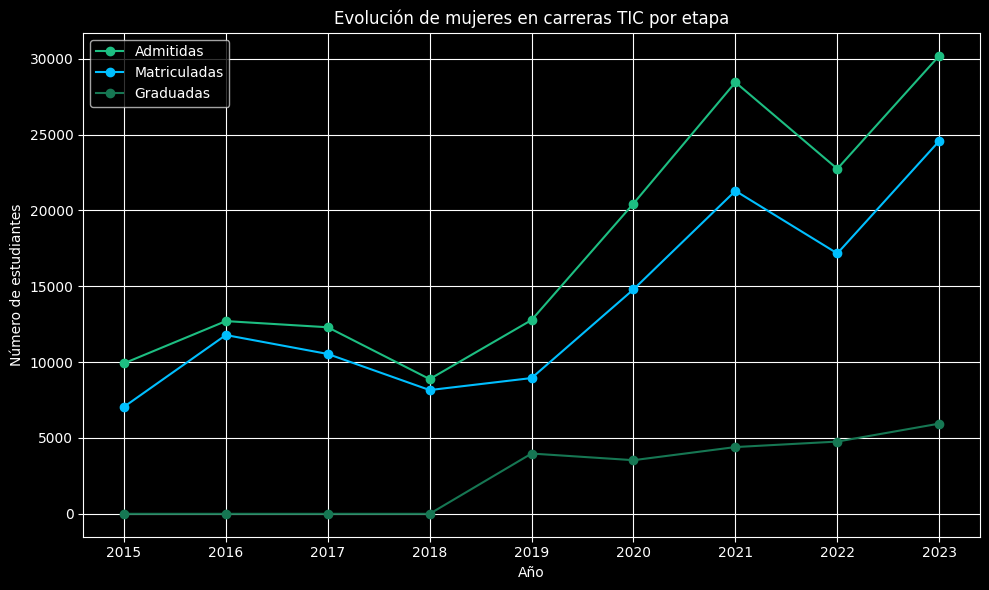

In [ ]:
# Grafico comparativo de líneas por etapa
# Crear resumen por etapa y año (solo mujeres)
ad = admitidos_por_año[admitidos_por_año["SEXO"].str.lower() == "femenino"].copy()
ma = matriculados_por_año[matriculados_por_año["SEXO"].str.lower() == "femenino"].copy()
gr = graduados_por_año[graduados_por_año["SEXO"].str.lower() == "femenino"].copy()


# Unir por año
resumen_etapas = ad.merge(ma, on="AÑO", suffixes=('_ADM', '_MAT')).merge(gr, on="AÑO")
resumen_etapas.rename(columns={"GRADUADOS": "GRADUADAS"}, inplace=True)

# Convertir año a int
resumen_etapas["AÑO"] = resumen_etapas["AÑO"].astype(float).astype(int).sort_values()


# Graficar línea por etapa
plt.figure(figsize=(10,6))
plt.plot(resumen_etapas["AÑO"], resumen_etapas["ADMITIDOS"], label="Admitidas", marker='o', color='#1dbe82')
plt.plot(resumen_etapas["AÑO"], resumen_etapas["PRIMER CURSO"], label="Matriculadas", marker='o', color='deepskyblue')
plt.plot(resumen_etapas["AÑO"], resumen_etapas["GRADUADAS"], label="Graduadas", marker='o', color='#167753')

plt.title("Evolución de mujeres en carreras TIC por etapa")
plt.xlabel("Año")
plt.ylabel("Número de estudiantes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10.2. Participación porcentual femenina por año

In [ ]:
def calcular_porcentaje(df, columna, nombre_salida):
    # Agrupación total por año
    total = df.groupby('AÑO')[columna].sum()

    # Agrupación de mujeres
    mujeres = df[df['SEXO'].str.lower().str.strip() == 'femenino'].groupby('AÑO')[columna].sum()

    # Unir y calcular porcentaje
    porcentaje = (mujeres / total * 100).reset_index(name=nombre_salida)

    return porcentaje

In [ ]:
pct_admitidas = calcular_porcentaje(df_Total, 'ADMITIDOS', '% Mujeres_Admitidas')
pct_matriculadas = calcular_porcentaje(df_Total, 'PRIMER CURSO', '% Mujeres_Matriculadas')
pct_graduadas = calcular_porcentaje(df_Total, 'GRADUADOS', '% Mujeres_Graduadas')

In [ ]:
resumen_pct = pct_admitidas.merge(pct_matriculadas, on='AÑO', how='outer') \
                            .merge(pct_graduadas, on='AÑO', how='outer') \
                            .sort_values('AÑO').reset_index(drop=True)
resumen_pct

,AÑO,% Mujeres_Admitidas,% Mujeres_Matriculadas,% Mujeres_Graduadas
0,2015,24.022279,24.913421,NaN
1,2016,23.956782,26.657921,NaN
2,2017,23.674687,25.114993,NaN
3,2018,22.031754,23.925157,NaN
4,2019,23.550665,21.149757,23.05728
5,2020,28.029161,26.566821,23.145906
6,2021,29.796594,28.200204,22.978124
7,2022,24.950632,23.764761,24.008267
8,2023,25.747732,25.796837,25.255915


#10.3. Top 10 IES con más mujeres admitidas

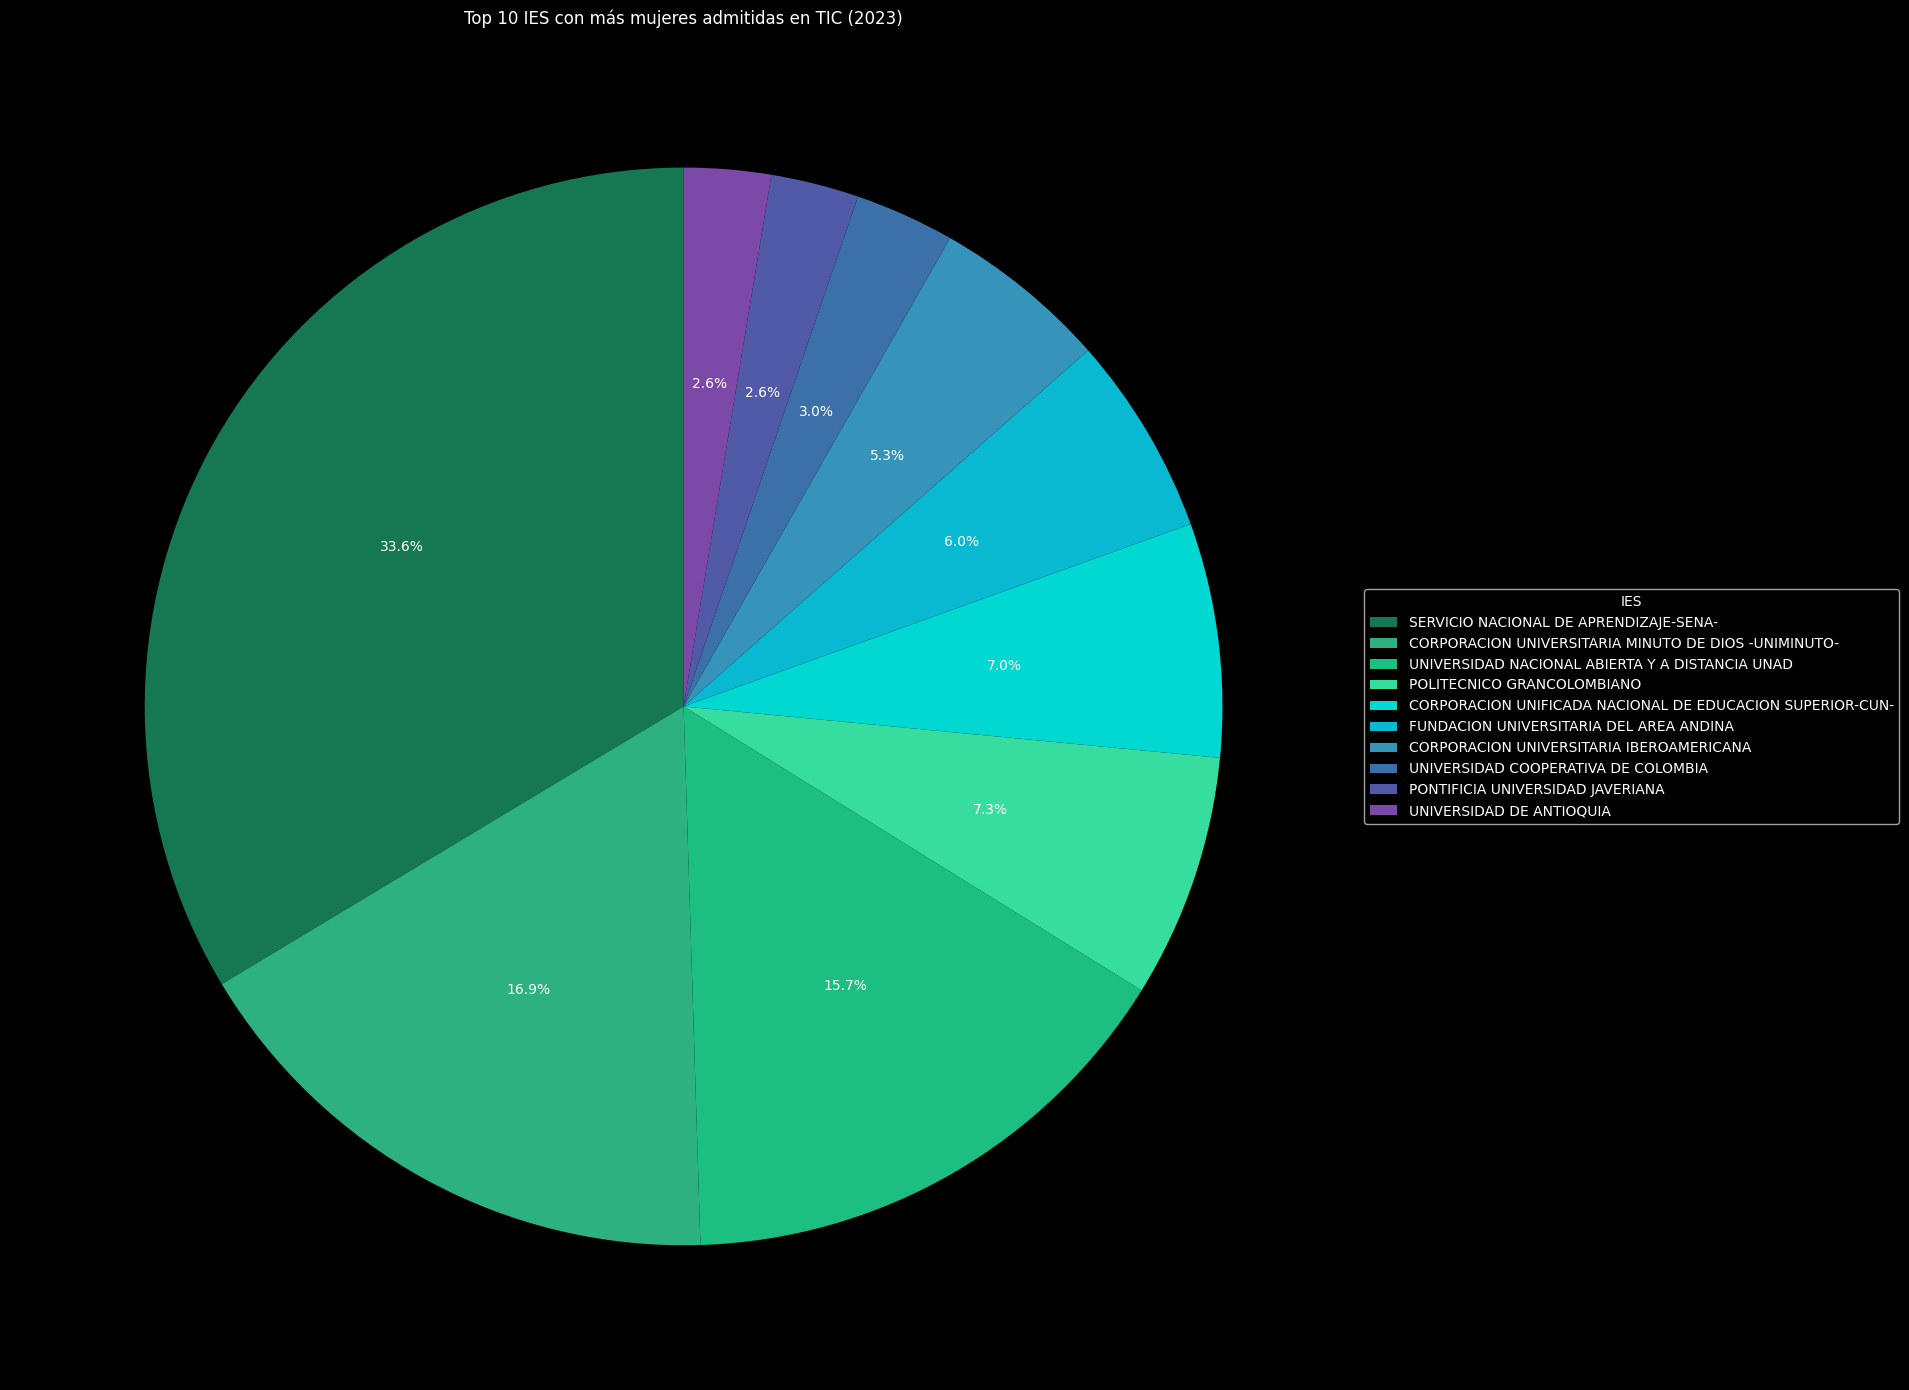

In [ ]:
# Filtrar top 10 IES con más mujeres admitidas en 2023
top_ies = df_admitidos[(df_admitidos['AÑO'] == 2023) & (df_admitidos['SEXO'] == 'Femenino')]
top_ies = top_ies.groupby('INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)')['ADMITIDOS'].sum().sort_values(ascending=False).head(10)

# Tu paleta personalizada
colores = ['#167753', '#2db180', '#1dbe82', '#36dd9f', '#00d8d1',
           '#09b9d2', '#3694bb', '#3b71a8', '#505aa7', '#7c49a9']

# Crear figura
fig, ax = plt.subplots(figsize=(18, 14))

# Gráfico de torta
ax.pie(
    top_ies.values,
    labels=[''] * len(top_ies),
    autopct='%1.1f%%',
    startangle=90,
    colors=colores  # ← Aquí aplicamos tu paleta
)

# Leyenda con nombres de las IES
ax.legend(
    top_ies.index,
    title='IES',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Título y mostrar
plt.title('Top 10 IES con más mujeres admitidas en TIC (2023)')
plt.tight_layout()
plt.show()

# 10.4.  Graduados TIC 2023

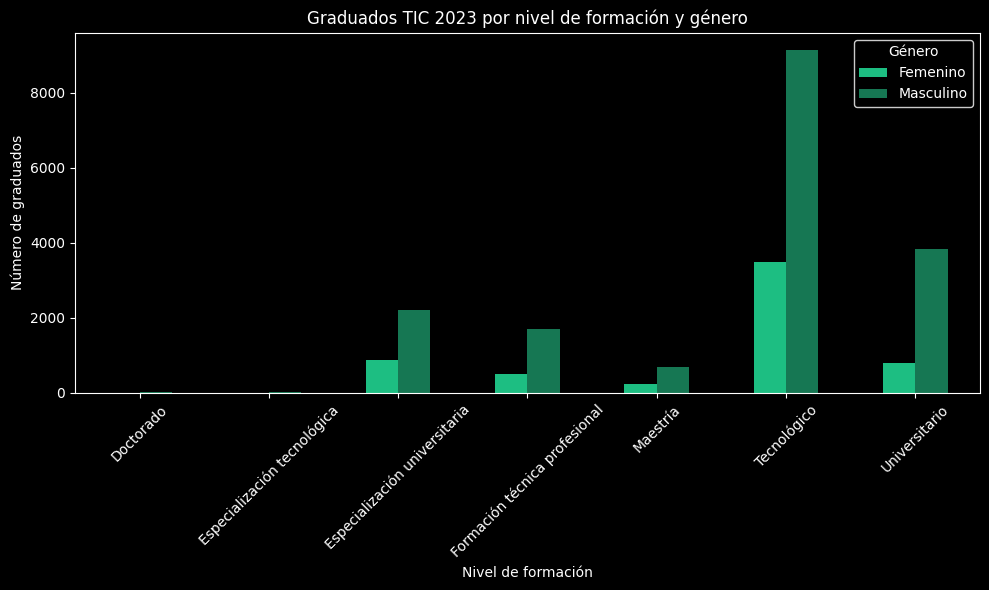

In [ ]:
# Filtrar por TIC, año 2023, niveles válidos y sexos binarios
niveles = df_graduados[
    (df_graduados['AÑO'] == 2023) &
    (df_graduados['ID CINE CAMPO AMPLIO'] == 6) &
    (~df_graduados['NIVEL DE FORMACIÓN'].isin(['Especialización médico quirúrgica', 'Especialización técnico profesional'])) &
    (df_graduados['SEXO'].isin(['Femenino', 'Masculino'])) &
    (df_graduados['GRADUADOS'] > 0)
].copy()

# Agrupar por nivel y sexo
niveles = niveles.groupby(['NIVEL DE FORMACIÓN', 'SEXO'])['GRADUADOS'].sum().unstack().fillna(0)

# Graficar
niveles.plot(kind='bar', figsize=(10,6),
             title='Graduados TIC 2023 por nivel de formación y género',
             color=['#1dbe82', '#167753'])

plt.xlabel('Nivel de formación', color='white')
plt.ylabel('Número de graduados', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.legend(title='Género', facecolor='black', edgecolor='white', labelcolor='white')
plt.show()

# 10.5 Mapa de calor por departamento

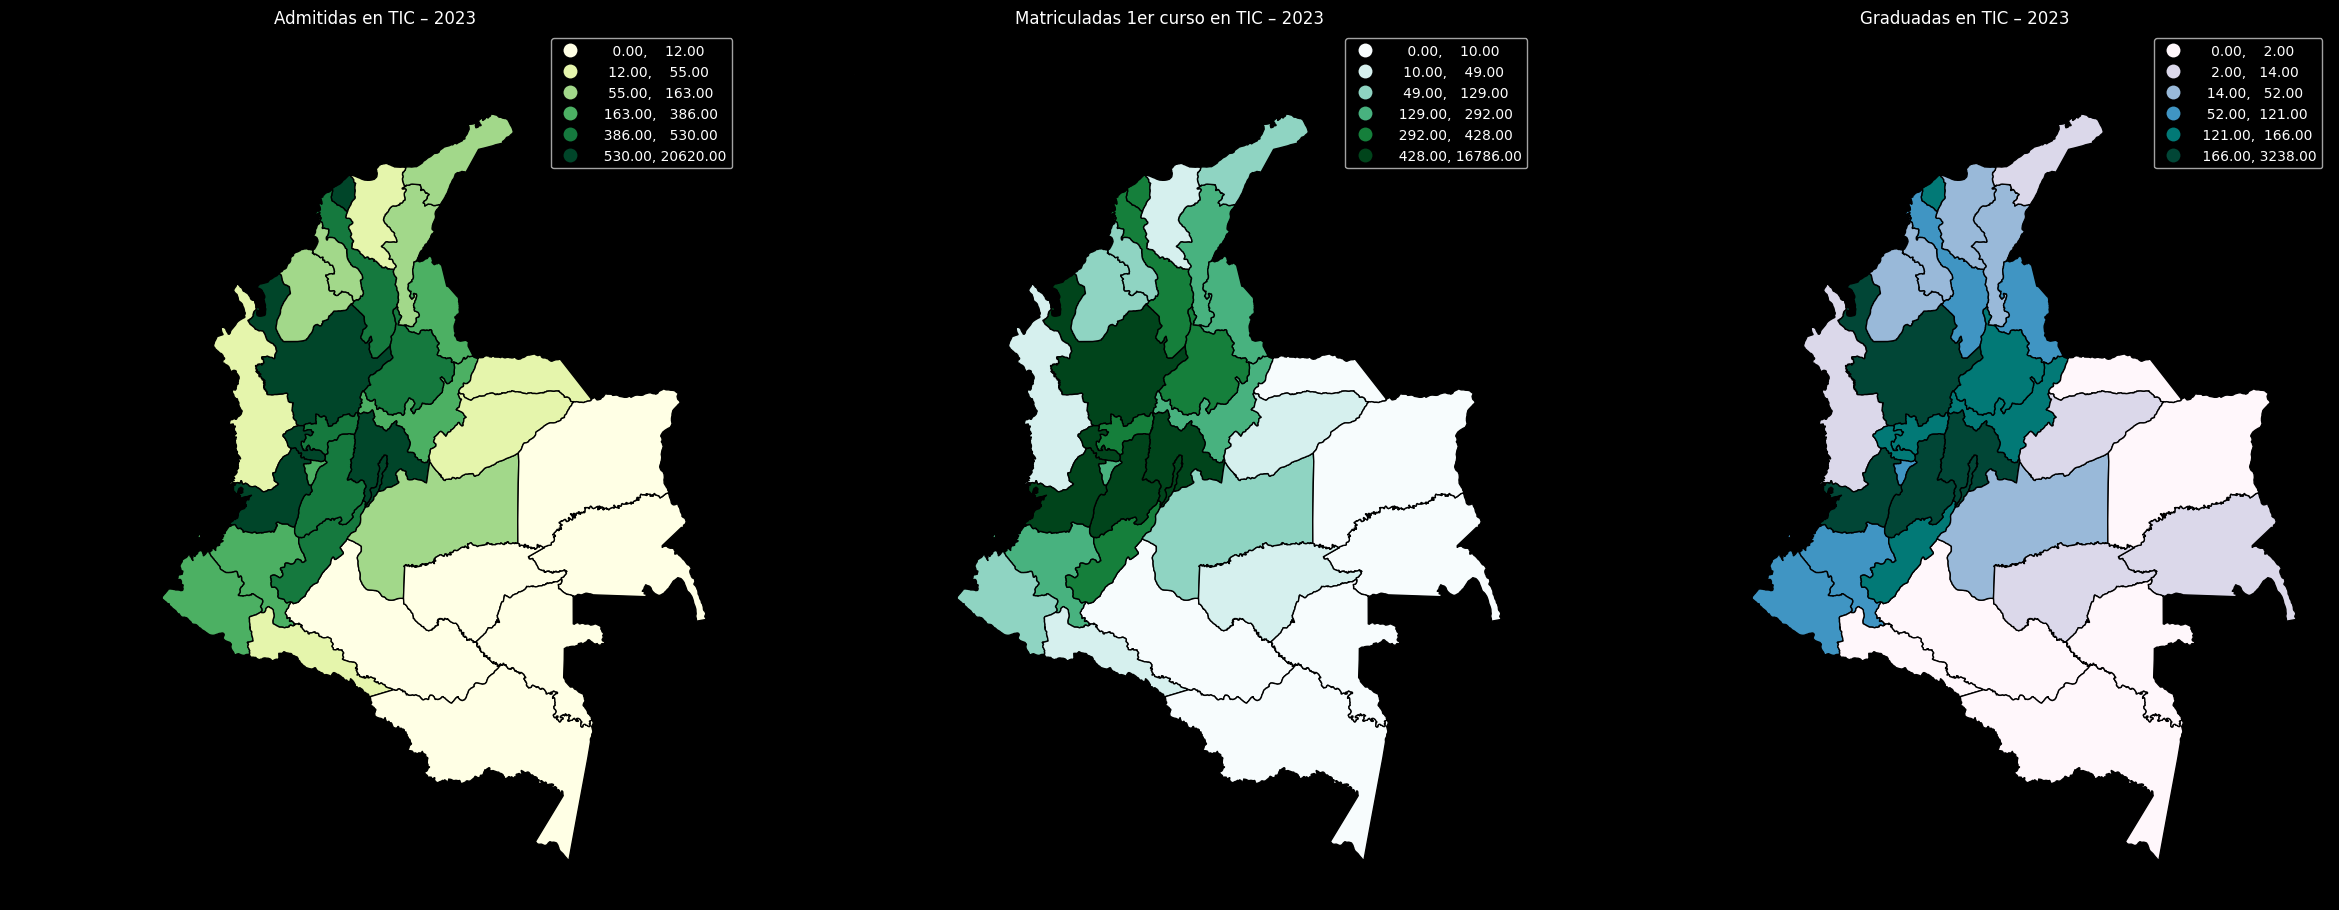

In [ ]:
# 1. Cargar GeoJSON de departamentos
gdf = gpd.read_file("/content/drive/MyDrive/Bases de Datos/colombia.geo.json")
gdf['DPTO'] = gdf['DPTO'].astype(int)

# 2. Filtrar por año y mujeres TIC
año = 2023

df_filtrado = df_Total[
    (df_Total['AÑO'] == año) &
    (df_Total['SEXO'].str.lower().str.strip() == 'femenino') &
    (df_Total['ID CINE CAMPO AMPLIO'] == 6)
]

# 3. Agrupar por departamento para cada etapa
admitidas = df_filtrado.groupby('CÓDIGO DEL DEPARTAMENTO (PROGRAMA)')['ADMITIDOS'].sum().reset_index()
matriculadas = df_filtrado.groupby('CÓDIGO DEL DEPARTAMENTO (PROGRAMA)')['PRIMER CURSO'].sum().reset_index()
graduadas = df_filtrado.groupby('CÓDIGO DEL DEPARTAMENTO (PROGRAMA)')['GRADUADOS'].sum().reset_index()

# 4. Unir los tres DataFrames
df_mapa = admitidas.merge(matriculadas, on='CÓDIGO DEL DEPARTAMENTO (PROGRAMA)', how='outer') \
                   .merge(graduadas, on='CÓDIGO DEL DEPARTAMENTO (PROGRAMA)', how='outer') \
                   .fillna(0)

df_mapa.rename(columns={
    'CÓDIGO DEL DEPARTAMENTO (PROGRAMA)': 'DPTO',
    'ADMITIDOS': 'Admitidas',
    'PRIMER CURSO': 'Matriculadas',
    'GRADUADOS': 'Graduadas'
}, inplace=True)

df_mapa['DPTO'] = df_mapa['DPTO'].astype(int)

# 5. Unir con el GeoDataFrame
mapa = gdf.merge(df_mapa, on='DPTO', how='left')
mapa[['Admitidas', 'Matriculadas', 'Graduadas']] = mapa[['Admitidas', 'Matriculadas', 'Graduadas']].fillna(0)

# 6. Crear los tres mapas
fig, axes = plt.subplots(1, 3, figsize=(24, 9))

# Delimitación de datos
bins_ad=[12,55,163, 386,530, 20620]
bins_mat=[10,49,129, 292,428, 16786]
bins_grad=[2,14,52, 121,166, 3238]

# Admitidas
mapa.plot(column='Admitidas', cmap='YlGn',scheme='user_defined',
    classification_kwds={'bins': bins_ad}, legend=True, ax=axes[0], edgecolor='black')
axes[0].set_title(f'Admitidas en TIC – {año}')
axes[0].axis('off')

# Matriculadas
mapa.plot(column='Matriculadas', cmap='BuGn',scheme='user_defined',
    classification_kwds={'bins': bins_mat}, legend=True, ax=axes[1], edgecolor='black')
axes[1].set_title(f'Matriculadas 1er curso en TIC – {año}')
axes[1].axis('off')

# Graduadas
mapa.plot(column='Graduadas', cmap='PuBuGn',scheme='user_defined',
    classification_kwds={'bins': bins_grad}, legend=True, ax=axes[2], edgecolor='black')
axes[2].set_title(f'Graduadas en TIC – {año}')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# 11. Análisis Descriptivo

In [ ]:
def resumen_etapa(df, columna_valor, nombre_columna):
    filtro = (df['SEXO'].str.lower().str.strip() == 'femenino') & (df['ID CINE CAMPO AMPLIO'] == 6)
    df_filtrado = df[filtro]
    return df_filtrado.groupby('AÑO')[columna_valor].sum().reset_index().rename(columns={columna_valor: nombre_columna})

admitidas = resumen_etapa(df_Total, 'ADMITIDOS', 'Admitidas')
matriculadas = resumen_etapa(df_Total, 'PRIMER CURSO', 'Matriculadas')
graduadas = resumen_etapa(df_Total, 'GRADUADOS', 'Graduadas')

# Unir correctamente sin perder años
resumen = admitidas.merge(matriculadas, on='AÑO', how='outer') \
                   .merge(graduadas, on='AÑO', how='outer') \
                   .fillna(0).sort_values('AÑO')
resumen

,AÑO,Admitidas,Matriculadas,Graduadas
0,2015,9920,7050,0
1,2016,12705,11786,0
2,2017,12299,10538,0
3,2018,8881,8158,0
4,2019,12776,8951,3973
5,2020,20454,14794,3536
6,2021,28448,21292,4401
7,2022,22743,17166,4763
8,2023,30199,24580,5946


In [ ]:
resumen.describe()

,AÑO,Admitidas,Matriculadas,Graduadas
count,9.0,9.0,9.0,9.0
mean,2019.0,17602.777778,13812.777778,2513.222222
std,2.738613,8072.682048,6126.370169,2471.116589
min,2015.0,8881.0,7050.0,0.0
25%,2017.0,12299.0,8951.0,0.0
50%,2019.0,12776.0,11786.0,3536.0
75%,2021.0,22743.0,17166.0,4401.0
max,2023.0,30199.0,24580.0,5946.0


# 12. Análisis Estadístico

# 12.1 Chi² Sexo vs Nivel de Formación

In [ ]:
# Filtrar solo mujeres y hombres si hay más categorías
df = df_Graduados[df_Graduados['SEXO'].isin(['Femenino', 'Masculino'])]

# Crear tabla de contingencia
tabla1 = pd.crosstab(df['SEXO'], df['NIVEL DE FORMACIÓN'])

# Aplicar prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla1)

print("Chi² entre SEXO y NIVEL DE FORMACIÓN")
print("Estadístico chi²:", round(chi2, 2))
print("p-valor:", round(p, 4))
print("Grados de libertad:", dof)
if p < 0.05:
    print("→ Existe asociación significativa entre sexo e institución.")
else:
    print("→ No se encontró asociación significativa.")

Chi² entre SEXO y NIVEL DE FORMACIÓN
Estadístico chi²: 6.2
p-valor: 0.4016
Grados de libertad: 6
→ No se encontró asociación significativa.


In [ ]:
tabla1

NIVEL DE FORMACIÓN,Doctorado,Especializacion Tecnologica,Especializacion Universitaria,Formacion Tecnica Profesional,Maestria,Tecnologico,Universitario
SEXO,,,,,,,
Femenino,36,154,1006,639,537,2361,1622
Masculino,62,180,1254,774,694,2830,1888


# 12.2 Chi² Sexo vs Institución de Educación Superior

In [ ]:
# Chi² entre sexo e institución educativa
tabla2 = pd.crosstab(df['SEXO'], df['INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)'])

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla2)

print("\nChi² entre SEXO e INSTITUCIÓN DE EDUCACIÓN SUPERIOR")
print("Estadístico chi²:", round(chi2, 2))
print("p-valor:", round(p, 4))
print("Grados de libertad:", dof)
if p < 0.05:
    print("→ Existe asociación significativa entre sexo e institución.")
else:
    print("→ No se encontró asociación significativa.")


Chi² entre SEXO e INSTITUCIÓN DE EDUCACIÓN SUPERIOR
Estadístico chi²: 148.92
p-valor: 1.0
Grados de libertad: 245
→ No se encontró asociación significativa.


# 13. Modelo Predictivo


# 13.1. Linea base

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar y unir las bases por departamento, año y sexo femenino
def preparar_etapa(df, columna_valor, nombre_columna):
    df_filtro = df[(df['SEXO'] == 'Femenino') & (df['ID CINE CAMPO AMPLIO'] == 6)]
    df_agg = df_filtro.groupby(['AÑO', 'CÓDIGO DEL DEPARTAMENTO (PROGRAMA)'])[columna_valor] \
                      .sum().reset_index()
    df_agg = df_agg.rename(columns={
        'CÓDIGO DEL DEPARTAMENTO (PROGRAMA)': 'COD_DEPTO',
        columna_valor: nombre_columna
    })
    return df_agg

admitidas = preparar_etapa(df_admitidos, 'ADMITIDOS', 'Admitidas')
matriculadas = preparar_etapa(df_matriculados, 'PRIMER CURSO', 'Matriculadas')
graduadas = preparar_etapa(df_graduados, 'GRADUADOS', 'Graduadas')

# Unir en un solo DataFrame
df_modelo = admitidas.merge(matriculadas, on=['AÑO', 'COD_DEPTO'], how='outer') \
                     .merge(graduadas, on=['AÑO', 'COD_DEPTO'], how='outer') \
                     .fillna(0)

# Entrenar el modelo de regresión
X = df_modelo[['AÑO', 'COD_DEPTO', 'Admitidas', 'Matriculadas']]
y = df_modelo['Graduadas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Evaluar y mostrar resultados
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("MSE:", mse)
print("R²:", r2)

Coeficientes: [-5.91511354 -0.45214031  0.06690684  0.10854842]
Intercepto: 12023.618840278288
MSE: 6934.663896875815
R²: 0.8498936283500067


# 13.2. Modelo 2 - Decision Tree Regressor

MSE: 28409.23503924647
R²: 0.3850592823951665


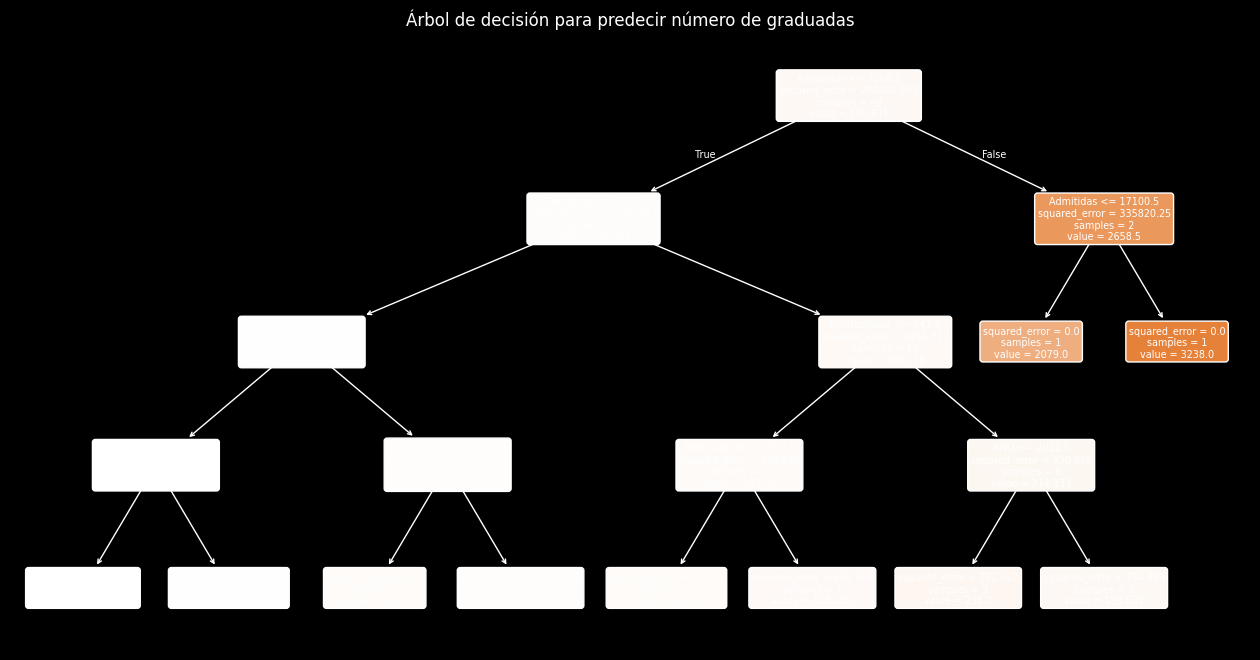

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Paso 1: Preparar datos
X = df_modelo[['AÑO', 'COD_DEPTO', 'Admitidas', 'Matriculadas']]
y = df_modelo['Graduadas']

# Paso 2: División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar árbol de decisión
arbol = DecisionTreeRegressor(max_depth=4, random_state=42)  # Puedes ajustar max_depth
arbol.fit(X_train, y_train)

# Paso 4: Predecir y evaluar
y_pred = arbol.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

# Paso 5: Visualizar árbol
plt.figure(figsize=(16, 8))
plot_tree(arbol, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de decisión para predecir número de graduadas")
plt.show()

# 13.3.Modelo 3 - Gradient Boosting

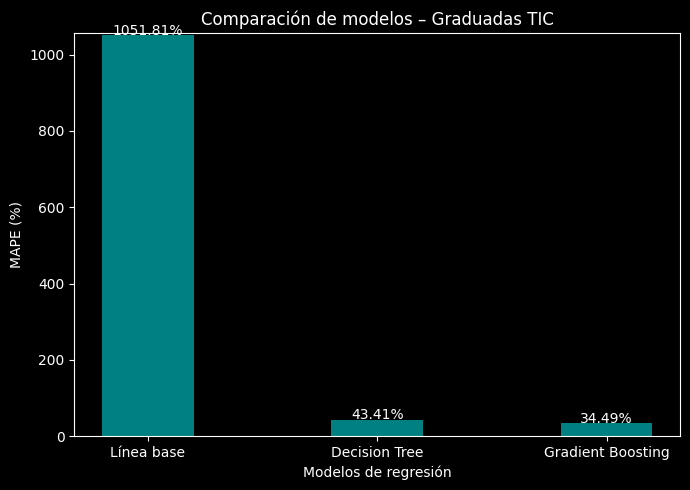

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Dividir en entrenamiento y prueba
train = df_modelo.sample(frac=0.8, random_state=42)
test = df_modelo.drop(train.index)

# Variable predictora: Matriculadas, objetivo: Graduadas
X_train = train['Matriculadas'].values.reshape(-1,1)
y_train = train['Graduadas'].values.reshape(-1,1)
X_test = test['Matriculadas'].values.reshape(-1,1)
y_test = test['Graduadas'].values.reshape(-1,1)

# Línea base (promedio)
baseline_pred = np.full_like(y_test, y_train.mean())

# Árbol de decisión
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

# Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train.ravel())
gbr_pred = gbr.predict(X_test)

# MAPE function
def mape(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # Filtrar solo valores donde y_true no es cero
    mask = y_true != 0
    return round(np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100, 2)

# Evaluaciones
baseline_mape = mape(y_test, baseline_pred)
dt_mape = mape(y_test, dt_pred)
gbr_mape = mape(y_test, gbr_pred)

# Gráfico comparativo
fig, ax = plt.subplots(figsize=(7,5))
x = ['Línea base', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]

ax.bar(x, y, width=0.4, color='teal')
ax.set_xlabel('Modelos de regresión')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for i, val in enumerate(y):
    plt.text(i, val + 0.5, f'{val}%', ha='center')

plt.title("Comparación de modelos – Graduadas TIC")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separar variables predictoras y objetivo
X = df_modelo[['AÑO', 'COD_DEPTO', 'Admitidas', 'Matriculadas']]
y = df_modelo['Graduadas']

# 2. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# 4. Evaluar desempeño (opcional)
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

MSE: 26375.14
R²: 0.4291


# 13.4. Modelo 4 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Usar múltiples variables predictoras
X = df_modelo[['AÑO', 'COD_DEPTO', 'Admitidas', 'Matriculadas']]
y = df_modelo['Graduadas']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test)

# Evaluar
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")


MAE: 67.36
MSE: 16020.64
R²: 0.6532


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Entrenar modelo con múltiples variables
X = df_modelo[['AÑO', 'COD_DEPTO', 'Admitidas', 'Matriculadas']]
y = df_modelo['Graduadas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Métricas
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.3f}")

MAE: 67.36
MSE: 16020.64
R²: 0.653


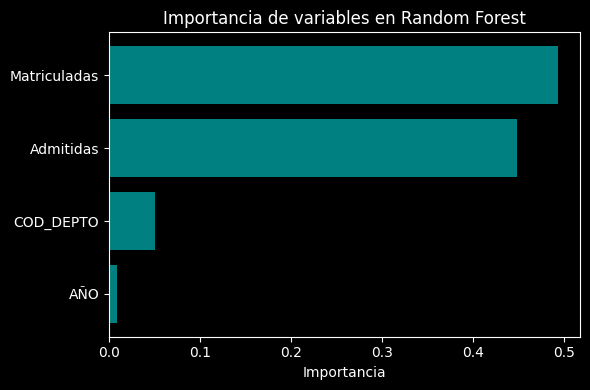

In [ ]:
importancia = rf_model.feature_importances_
variables = X.columns

plt.figure(figsize=(6,4))
plt.barh(variables, importancia, color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de variables en Random Forest')
plt.tight_layout()
plt.show()

# 13.5. Comparación de Modelos

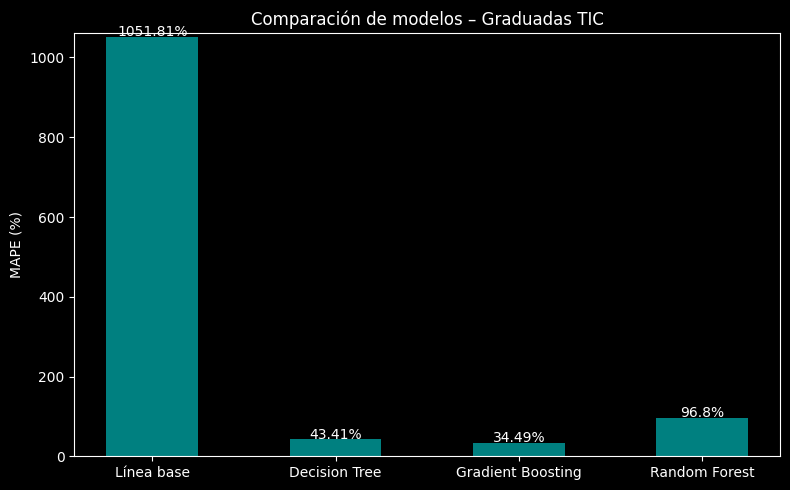

In [ ]:
# Calcular MAPE para Random Forest
def mape(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    mask = y_true != 0
    return round(np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100, 2)

rf_mape = mape(y_test, rf_pred)

# Comparar todos
x = ['Línea base', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
y = [baseline_mape, dt_mape, gbr_mape, rf_mape]

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, y, width=0.5, color='teal')
ax.set_ylabel('MAPE (%)')
ax.set_title('Comparación de modelos – Graduadas TIC')
ax.set_ylim(0, max(y)+10)

for i, val in enumerate(y):
    plt.text(i, val + 1, f'{val}%', ha='center')

plt.tight_layout()
plt.show()

#13.6 Predicción para graduadas en Antioquia en 2024

In [ ]:
# Asegúrate de tener ya entrenado el modelo Gradient Boosting:
# gbr = GradientBoostingRegressor(...)
# gbr.fit(X_train, y_train)

# Crear una nueva entrada con los datos a predecir
nueva_entrada = pd.DataFrame([[2024, 5, 500, 450]], columns=['AÑO', 'COD_DEPTO', 'Admitidas', 'Matriculadas'])

# Hacer la predicción
prediccion = gbr.predict(nueva_entrada)

# Mostrar el resultado
print(f"🎓 Graduadas estimadas en carreras TIC (2024, Antioquia): {int(prediccion[0])} mujeres")


🎓 Graduadas estimadas en carreras TIC (2024, Antioquia): 167 mujeres
